<a href="https://colab.research.google.com/github/Royal4224/ENM_5320/blob/main/Code/finiteDifferenceExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

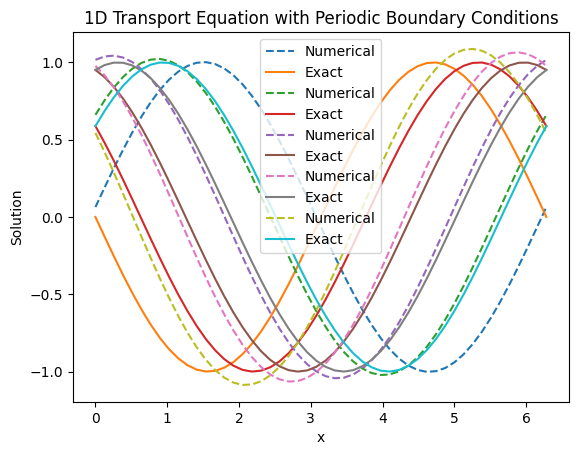

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
L = 2.0*np.pi  # Length of the domain
T = np.pi   # Total time
nx = 50  # Number of spatial points
nt = 50  # Number of time steps

# Discretization
dx = L / nx
dt = T / nt
x = np.linspace(0, L, nx)
u = np.sin(2 * np.pi * x / L)  # Initial condition
uexact = np.sin(2 * np.pi * (x-T) / L)  # Exact solution

# Time-stepping loop
for n in range(nt):
    u_new = np.zeros_like(u)
    for i in range(nx):
        u_new[i] = u[i] + ( 0.5 * dt / dx) * (u[(i+1) % (nx-1)] - u[(i-1) % (nx-1)])
    for i in range(nx):
        u[i] = u_new[i]
    if n % 10 == 0:
      tn = n*dt
      uexact = np.sin(-2 * np.pi * (x-tn) / L)
      plt.plot(x, u,'--',label='Numerical')
      plt.plot(x, uexact, label='Exact')

plt.legend()
plt.xlabel('x')
plt.ylabel('Solution')
plt.title('1D Transport Equation with Periodic Boundary Conditions')
plt.show()